# Tutorial Plot Data - 03

## Panggil library yang dibutuhkan

- pandas: untuk membuka file CSV atau Excel
- matplotlib: untuk plotting
- scipy: untuk mencari curva fitting

$sin(x)$

In [1]:
import matplotlib
import matplotlib.pyplot as plt  # inisialisasi library pyplot dengan nama alias plt
import numpy as np
import pandas as pd  # initialisasi library pandas dengan nama alias pd
from scipy.optimize import curve_fit

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

## Open Data

[pandas.read_csv — pandas 1.5.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)[pandas.read_csv — pandas 1.5.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [2]:
data = pd.read_csv("../data/data-time-series.csv")
data.head()

,range,score
0,20,0.650000
1,30,0.766667
2,40,0.775000
3,50,0.820000
4,60,0.816667


In [3]:
x = data["range"].values
y = data["score"].values

## Curve Fit

[scipy.optimize.curve_fit — SciPy v1.9.3 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [4]:
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f


popt, _ = curve_fit(objective, x, y)
a, b, c, d, e, f = popt

x_line = np.arange(20, 460, 1)
y_line = objective(x_line, a, b, c, d, e, f)

## Basic Plot

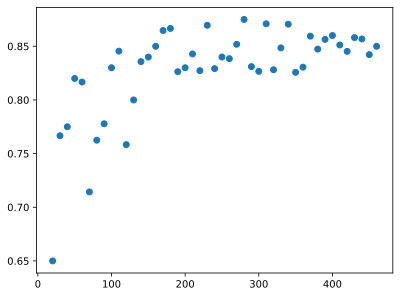

In [5]:
plt.scatter(x, y)

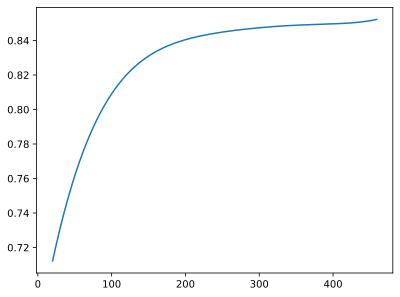

In [6]:
plt.plot(x_line, y_line)

### Menyiapkan kanvas

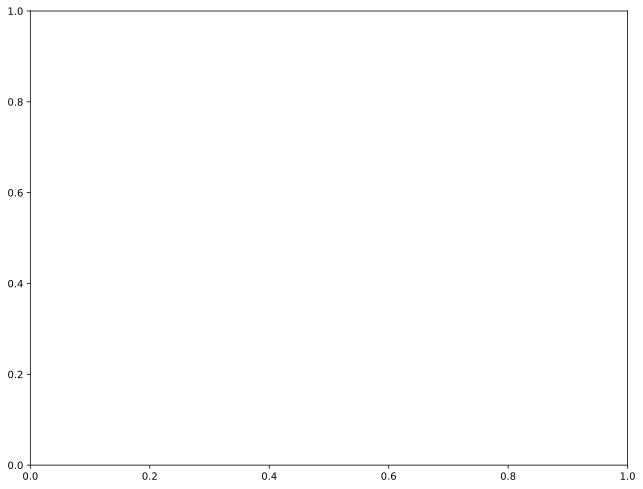

In [7]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])

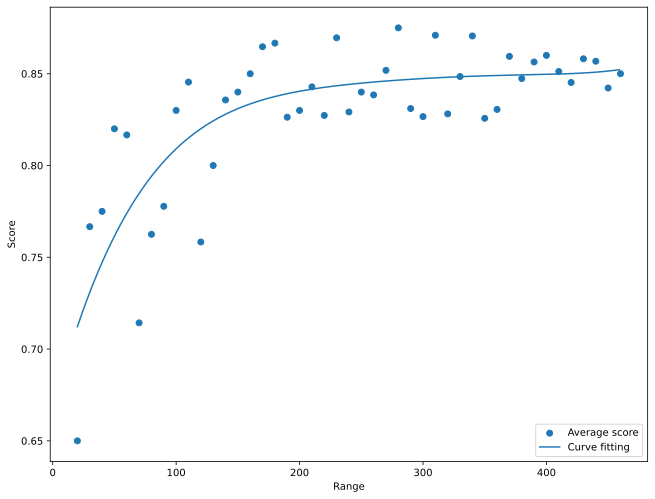

In [8]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])
ax.scatter(x, y, label="Average score")
ax.plot(x_line, y_line, label="Curve fitting")
ax.set_xlabel("Range")
ax.set_ylabel("Score")
plt.legend(loc=4)

### Custom style

In [9]:
plt.style.use("classic")
params = {
    "axes.formatter.useoffset": False,
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "xtick.labelsize": 28,
    "ytick.labelsize": 28,
    "axes.labelsize": 28,
    "axes.labelweight": "bold",
    "axes.titlesize": 28,
    "axes.titleweight": "bold",
    "figure.dpi": 300,
    # "figure.figsize": figsize,
    # "legend.loc": loc,
    "legend.fontsize": 24,
    "legend.fancybox": True,
    "mathtext.fontset": "custom",
    "mathtext.default": "regular",
    "figure.autolayout": False,
    "patch.edgecolor": "#000000",
    "text.color": "#000000",
    "axes.edgecolor": "#000000",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
}
matplotlib.rcParams.update(params)

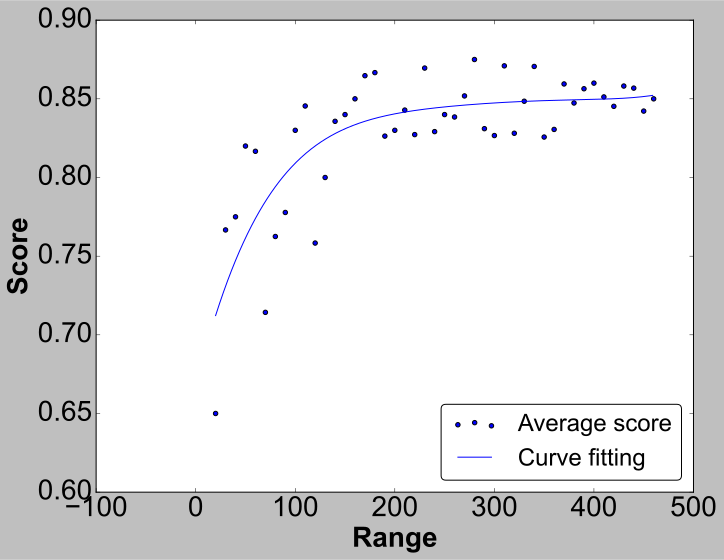

In [10]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])
ax.scatter(x, y, label="Average score")
ax.plot(x_line, y_line, label="Curve fitting")
ax.set_xlabel("Range")
ax.set_ylabel("Score")
plt.legend(loc=4)

#### Optimasi

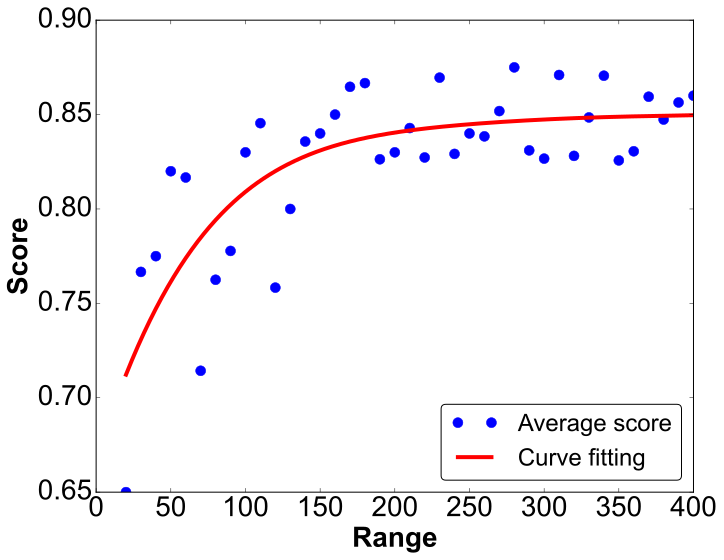

In [11]:
fig, ax = plt.subplots(figsize=[10.72, 8.205])
ax.plot(x, y, ".", label="Average score", markersize=20)
ax.plot(x_line, y_line, label="Curve fitting", color="red", linewidth=4)
ax.set_xlabel("Range")
ax.set_ylabel("Score")
ax.set_xlim([0, 400])
plt.legend(loc=4)
fig.patch.set_facecolor("xkcd:white")

### Save figure

In [12]:
# save ke PNG (dpi=600)
fig.savefig("../reports/figures/01_fitting-data.png", dpi=600)

# save ke PDF
fig.savefig("../reports/figures/01_fitting-data.pdf")

# save ke SVG
fig.savefig("../reports/figures/01_fitting-data.svg")